In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
 import datetime as dt

#Reflect tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import create_engine, func, inspect, distinct

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connection = engine.connect()

In [6]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
 # We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
 # Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
 # Create our session (link) from Python to the DB
Session = sessionmaker(bind=engine)
session = Session()

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
station_columns = inspector.get_columns('station')
for s_c in station_columns:
    print(s_c['name'], s_c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
station_columns = inspector.get_columns('measurement')
for m_c in station_columns:
    print(m_c['name'], m_c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
station_db = pd.read_sql_query('SELECT * FROM Station;', connection)
station_db

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [14]:
measurement_db = pd.read_sql_query('SELECT * FROM Measurement;', connection)
measurement_db

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


 #Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [16]:
# Calculate the date 1 year ago from the last data point in the database

In [17]:
# date of first data set
First_Date = session.query(Measurement.date).order_by(Measurement.date.asc()).first()
first_date = First_Date[0]
first_date

'2010-01-01'

In [18]:
# date of last data set as string
Last_Date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = Last_Date[0]
last_date

'2017-08-23'

In [19]:
# date from one year ago as a string
year_ago = dt.date(int(last_date[0:4]), int(last_date[5:7]), int(last_date[8:11])) - dt.timedelta(days = 365)
year_ago_date = str(year_ago)
year_ago_date

'2016-08-23'

In [20]:
type(year_ago)

datetime.date

In [21]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= last_date, Measurement.date >= year_ago_date).all()

In [22]:
prcp_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

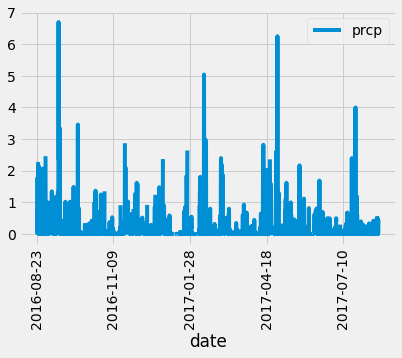

In [23]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_data).set_index('date')
# Sort the dataframe by date
df_sorted_date = df.sort_values('date')
df_sorted_date
# Use Pandas Plotting with Matplotlib to plot the data
df_sorted_date.plot(rot=90)

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_sorted_date.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
num_stations = session.query(func.count(distinct(Measurement.station))).all()
print(f" There were {num_stations[0][0]} weather stations monitored in Hawaii in this study.")

 There were 9 weather stations monitored in Hawaii in this study.


In [26]:
# type(num_stations)

In [27]:
 # Design a query to show how many stations are available in this dataset?
num_stations = session.query(func.count(distinct(Measurement.station))).all()
print(f" There were {num_stations[0][0]} weather stations monitored in Hawaii in this study.")
    
# count_stations = measurement_db.groupby("station").describe()
# num_stations = len(count_stations)
# num_stations
# # count_stations

 There were 9 weather stations monitored in Hawaii in this study.


In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [29]:
#select the columns
sel = [Measurement.station, func.count(Measurement.station)]

In [30]:
active_station = session.query(*sel).group_by(Measurement.station).order_by\
                    (func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
first_station = session.query(*sel).group_by(Measurement.station).order_by\
                    (func.count(Measurement.station).desc()).first()
first_station

('USC00519281', 2772)

In [32]:
most_active = active_station[0][0]

In [33]:
print(f"The most active station is {most_active} with {active_station[0][1]} observations.")

The most active station is USC00519281 with 2772 observations.


In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel2 = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
temp = session.query(*sel2).filter(Measurement.station == most_active).all()

min_temp = round(temp[0][0],1)
max_temp = round(temp[0][1],1)
avg_temp = round(temp[0][2],1)

print(f"At station {most_active} the minimum temperature was {min_temp}F,\
the maximum was {max_temp}, and the average was {avg_temp}")

At station USC00519281 the minimum temperature was 54.0F,the maximum was 85.0, and the average was 71.7


In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [36]:
tobs_ann = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
             filter(Measurement.date >= year_ago_date, Measurement.station == most_active).all()
df = pd.DataFrame(tobs_ann)
df = df.set_index("date")
df.head()

,station,tobs
date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0


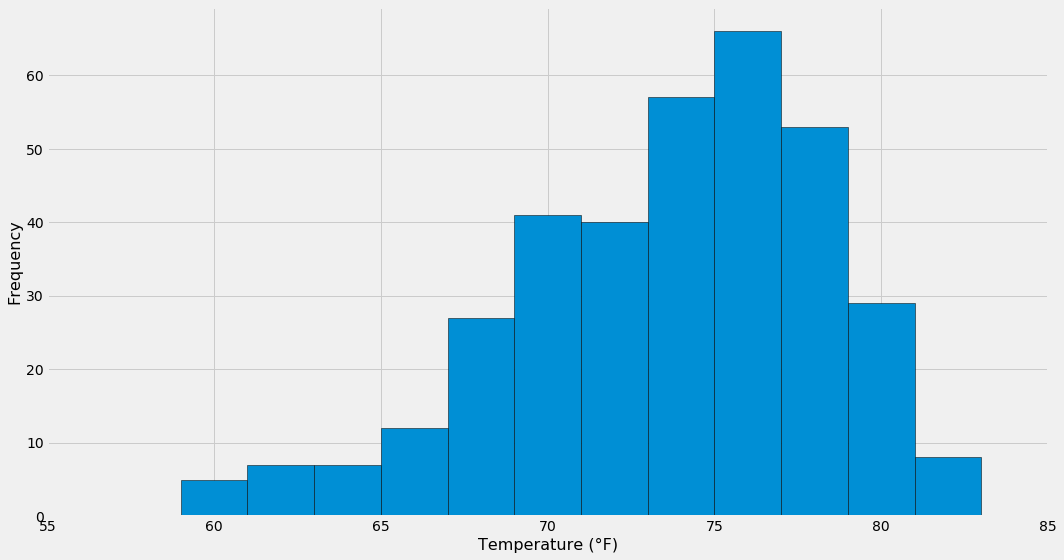

In [37]:
# create a histogram 
plt.figure(figsize = (15,8))
plt.hist(df['tobs'], bins = 12, edgecolor = "black")
plt.xlabel("Temperature (°F)", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.xlim(55, 85)
plt.tight_layout()

#Bonus Challenge Assignment

In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [39]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
prev_year_temp = calc_temps('2011-02-28', '2011-03-05')
prev_year_temp

[(61.0, 69.75510204081633, 75.0)]

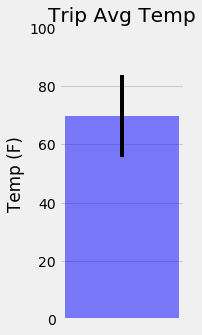

In [40]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr_temp = prev_year_temp[0][2] - prev_year_temp[0][0]
plt.figure(figsize=(2,5))
plt.bar(1,prev_year_temp[0][1],yerr=yerr_temp, color='blue',alpha=0.5)
plt.title("Trip Avg Temp")
plt.xticks([ ])
plt.ylim(0,100)
plt.ylabel("Temp (F)")
plt.show()

In [41]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [42]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [43]:
import datetime
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
vacation_start = '2018-01-01'
vacation_end = '2018-01-07'

# Use the start and end date to create a range of dates

trip_dates = pd.date_range(vacation_start, vacation_end, freq = 'D')
trip_dates

# start_date = datetime.date(2018,1,1)
# number_of_days = 7
# date_list = []
# # for day in range(number_of_days):
#   date = (start_date + datetime.timedelta(days = day)).isoformat()
#   date_list.append(date)

# print(date_list)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [44]:
# convert the string
# Stip off the year and save a list of %m-%d strings
# stip_dates = [date.strptime("%m-%d") for dates in trip_dates]
# stip_dates

trip_d_m = trip_dates.strftime("%m-%d")
trip_d_m

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_d_m:
    normals.append(*daily_normals(date))
print(normals)

[(62.0, 69.15384615384616, 77.0), (60.0, 69.39622641509433, 77.0), (62.0, 68.9090909090909, 77.0), (58.0, 70.0, 76.0), (56.0, 67.96428571428571, 76.0), (61.0, 68.96491228070175, 76.0), (57.0, 68.54385964912281, 76.0)]


In [45]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [46]:
#Creating the dataframe
normal_df = pd.DataFrame(normals, columns = ['Tmin', 'Tavg', 'Tmax'])
normal_df

,Tmin,Tavg,Tmax
0,62.0,69.153846,77.0
1,60.0,69.396226,77.0
2,62.0,68.909091,77.0
3,58.0,70.000000,76.0
4,56.0,67.964286,76.0
5,61.0,68.964912,76.0
6,57.0,68.543860,76.0


In [47]:
#adding date index
normal_df['Date'] = trip_dates
normal_df = normal_df.set_index('Date')
normal_df

,Tmin,Tavg,Tmax
Date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0
2018-01-06,61.0,68.964912,76.0
2018-01-07,57.0,68.543860,76.0


In [48]:
 # Plot the daily normals as an area plot with `stacked=False`
#make a colors list
colors = ['cornflowerblue', 'salmon', 'moccasin']

In [49]:
#make an area plot for the predicted temps

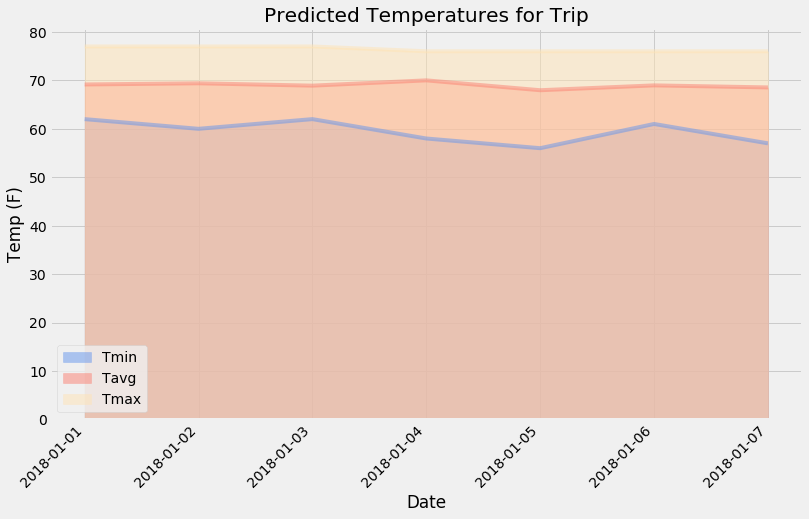

In [50]:
normal_df.plot(kind='area', figsize=(12,8), stacked = False,\
               x_compat=True, color=colors, title = 'Predicted Temperatures for Trip', rot=45)
plt.xlabel('Date')
plt.ylabel('Temp (F)')

plt.show()
